In [91]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder



In [92]:
#cp_data = covid data 
cp_data_main = pd.read_csv (r'C:\Users\samya\PyCharmProject\COVID-Global-Data-Analysis\covid_dataset\corona.csv')

C:\Users\samya\AppData\Local\Temp\ipykernel_6052\141663960.py:2: DtypeWarning: Columns (2,3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  cp_data_main = pd.read_csv (r'C:\Users\samya\PyCharmProject\COVID-Global-Data-Analysis\covid_dataset\corona.csv')


In [93]:
cp_data= cp_data_main.copy()

In [94]:
def df_cleaning(df):
    # function to check and clean the 
    print('=============================================')
    print("Check the null value and print the summary report",df.isnull().sum())
    print('=============================================')
    print ("\nShape of the dataframe", df.shape)
    print('=============================================')
    print('Dataframe Info',df.info())
    print('=============================================')
    print("Check the null value and print the summary report",df.isnull().sum())
    print('=============================================')
    print("\nShape of the dataframe", df.shape)
    print('=============================================')
    print("\nData Types of each columns", df.dtypes)
    print('=============================================')
    print("\nColumn info\n", df.columns)
    print('=============================================')
    print('\nCheck Duplicate values in Dataframe\n', df.duplicated().sum())
    print('=============================================')
    print('\nCheck the unique values of dataframe\n', df.nunique())
    print('=============================================')


In [95]:
print("\n Dataset country_wise_latest")
df_cleaning(cp_data) 


 Dataset country_wise_latest
Check the null value and print the summary report Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

Shape of the dataframe (278848, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278

In [96]:
cp_data['Test_date'].value_counts()

Test_date
20-04-2020    10921
19-04-2020    10199
22-04-2020     9646
21-04-2020     9624
16-04-2020     9138
23-04-2020     8744
01-04-2020     8654
13-04-2020     8425
02-04-2020     8188
03-04-2020     8079
17-04-2020     7645
05-04-2020     7509
30-04-2020     7313
27-04-2020     7304
15-04-2020     7149
31-03-2020     7134
24-04-2020     7028
26-03-2020     6663
14-04-2020     6571
28-04-2020     6334
18-04-2020     6321
26-04-2020     6131
12-04-2020     5984
27-03-2020     5963
07-04-2020     5931
30-03-2020     5915
10-04-2020     5678
28-03-2020     5602
25-03-2020     5495
06-04-2020     5368
29-03-2020     5277
04-04-2020     5145
25-04-2020     5052
24-03-2020     4735
09-04-2020     4539
11-04-2020     4341
29-04-2020     4259
08-04-2020     4058
22-03-2020     3565
23-03-2020     3494
19-03-2020     2243
18-03-2020     1991
20-03-2020     1870
21-03-2020     1648
17-03-2020     1463
16-03-2020     1304
15-03-2020      985
13-03-2020      686
12-03-2020      634
14-03-2020

In [97]:
cp_data['Corona'].value_counts()

Corona
negative    260227
positive     14729
other         3892
Name: count, dtype: int64

In [98]:
cp_data.duplicated().sum()

np.int64(0)

In [99]:
cp_data.drop(columns=['Age_60_above','Sex'],inplace=True)

In [100]:
cp_data.dropna(inplace=True)

In [101]:
cp_data.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Known_contact          0
dtype: int64

In [102]:
df_covid= cp_data.drop(['Ind_ID','Test_date'],axis=1)

In [103]:
df_covid.Corona.value_counts()

Corona
negative    260008
positive     14694
other         3892
Name: count, dtype: int64

In [104]:
df = df_covid[(df_covid['Corona'] == 'positive') | (df_covid['Corona'] == 'negative')]


In [105]:
df_covid.describe()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
count,278594,278594,278594,278594,278594,278594,278594
unique,2,2,2,2,2,3,3
top,False,False,False,False,False,negative,Other
freq,236368,256843,276672,277020,276186,260008,242504


In [106]:
df.Corona.value_counts()

Corona
negative    260008
positive     14694
Name: count, dtype: int64

Visualization



In [107]:
df2= cp_data_main.copy()

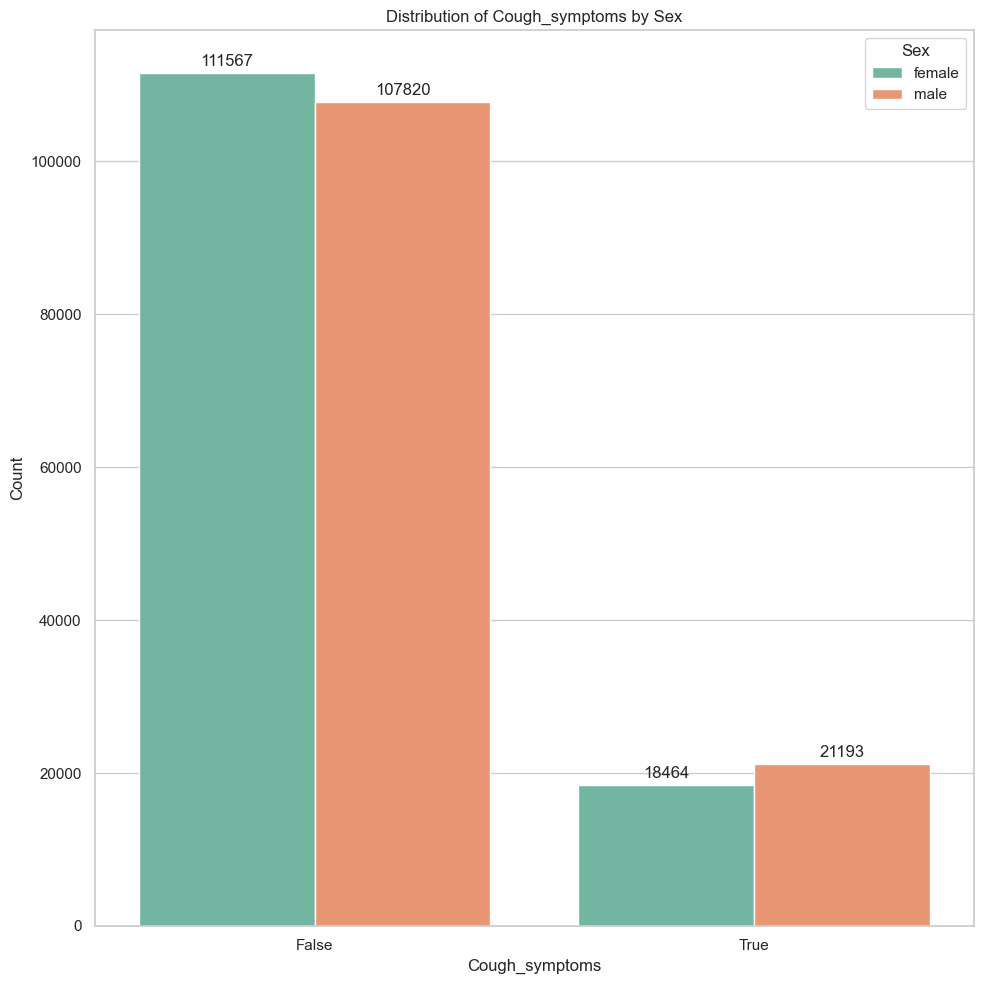

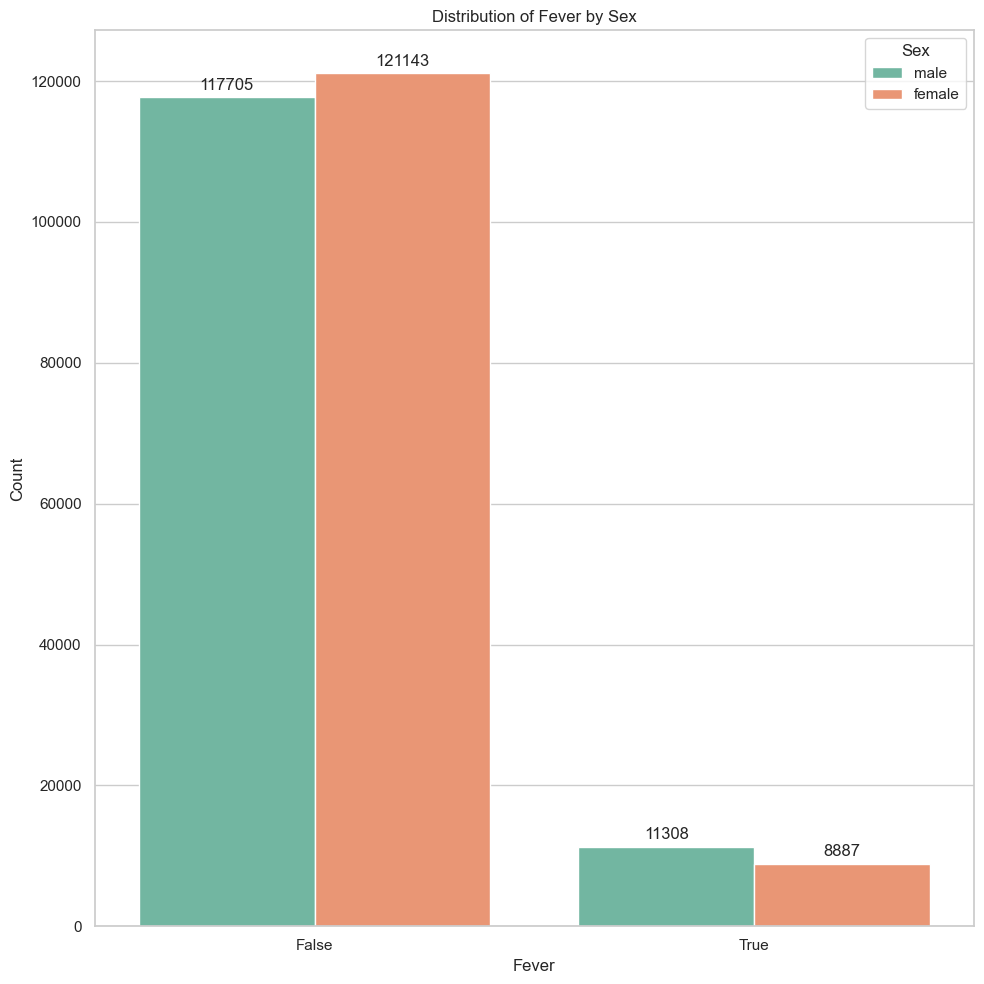

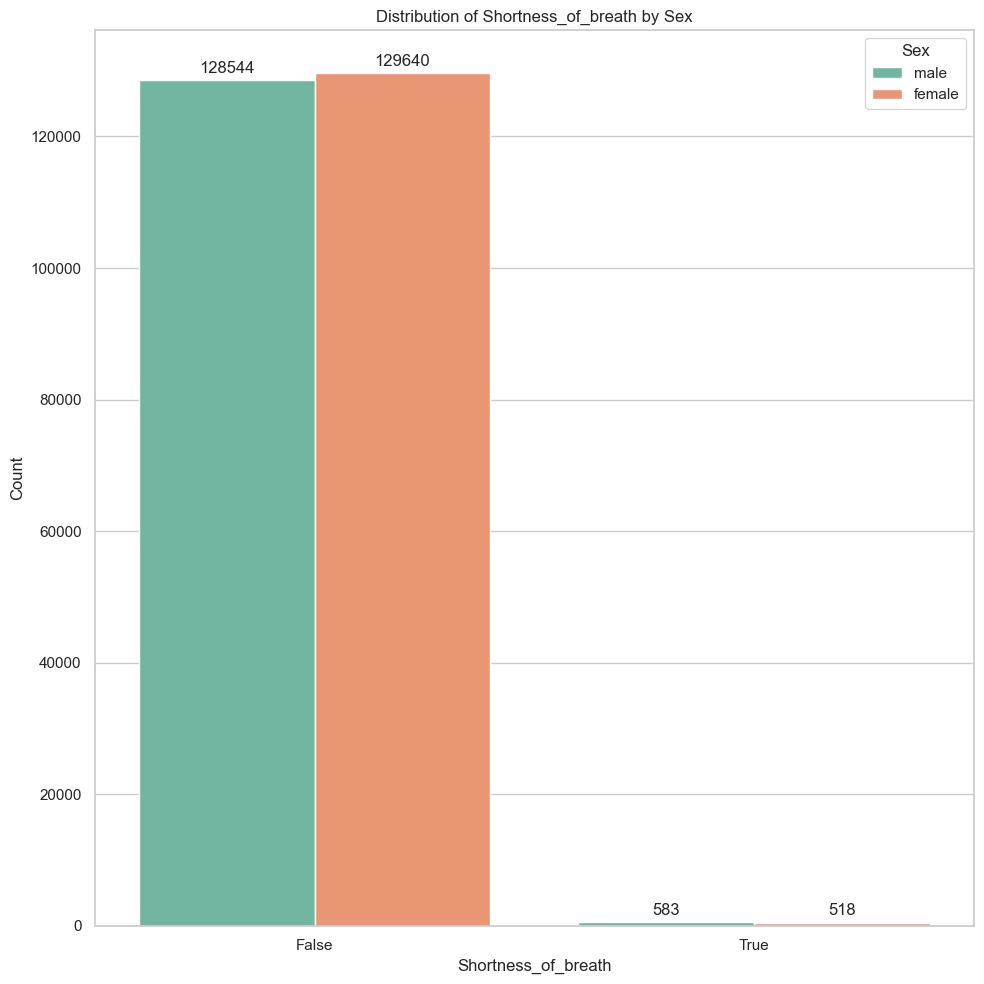

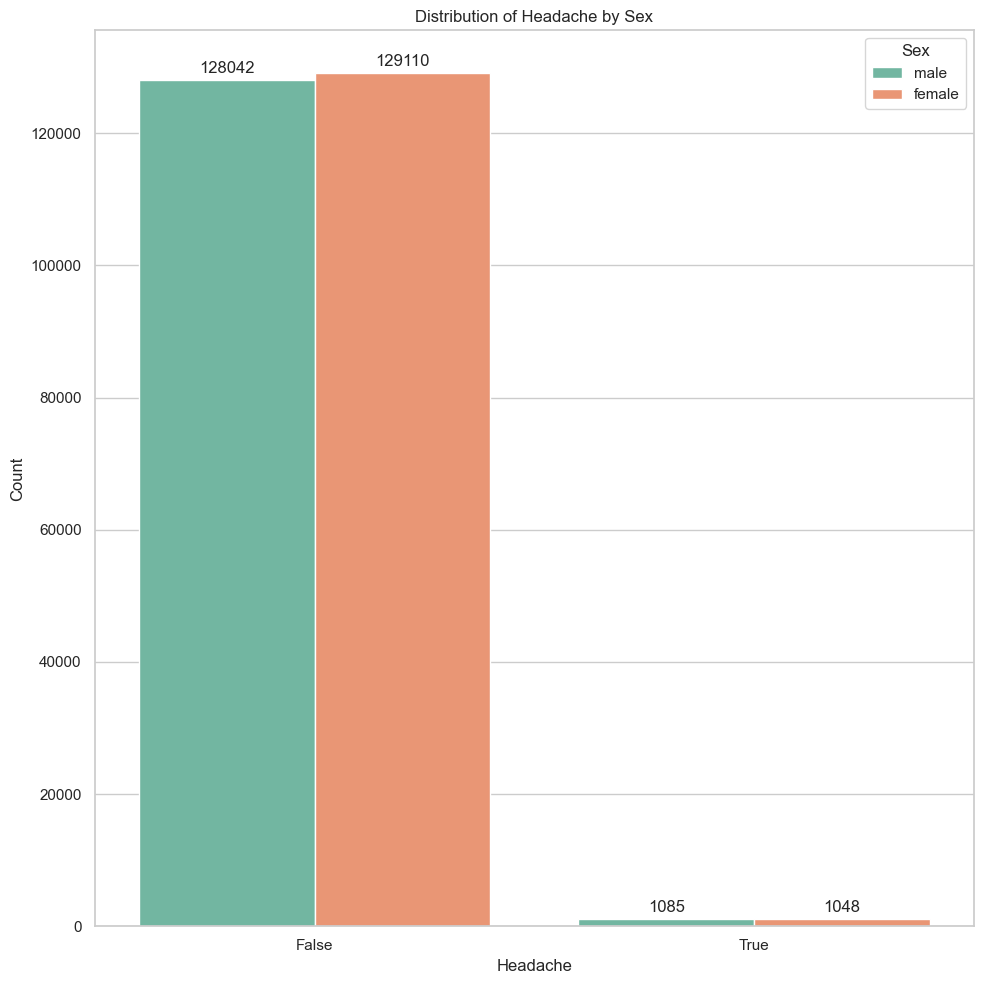

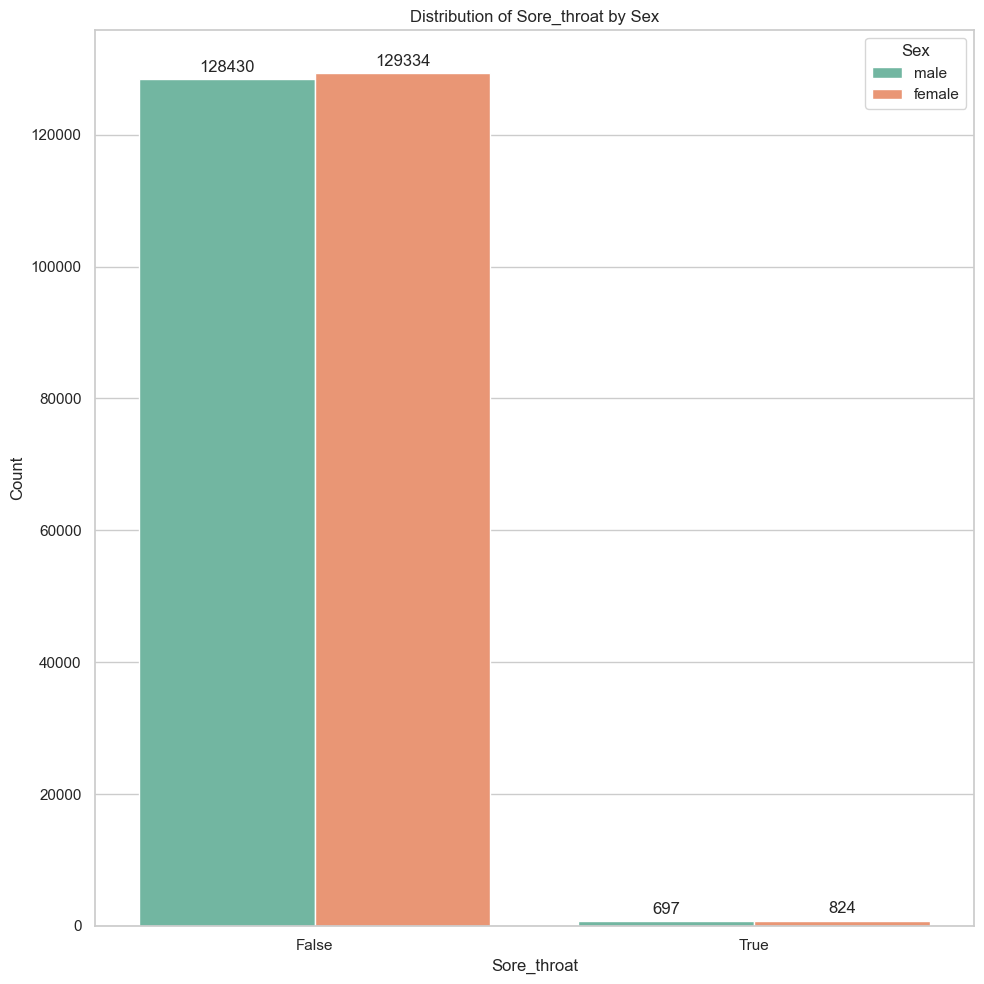

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of symptom columns
symptoms = ['Cough_symptoms', 'Fever', 'Shortness_of_breath', 'Headache', 'Sore_throat']

# Set plot style
sns.set(style="whitegrid")

# Loop through each symptom and create a bar plot
for symptom in symptoms:
    plt.figure(figsize=(10,10))
    ax = sns.countplot(data=df2, x=symptom, hue='Sex', palette='Set2')

    # Add value labels on top of each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

    # Add title and labels
    plt.title(f'Distribution of {symptom} by Sex')
    plt.xlabel(symptom)
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()


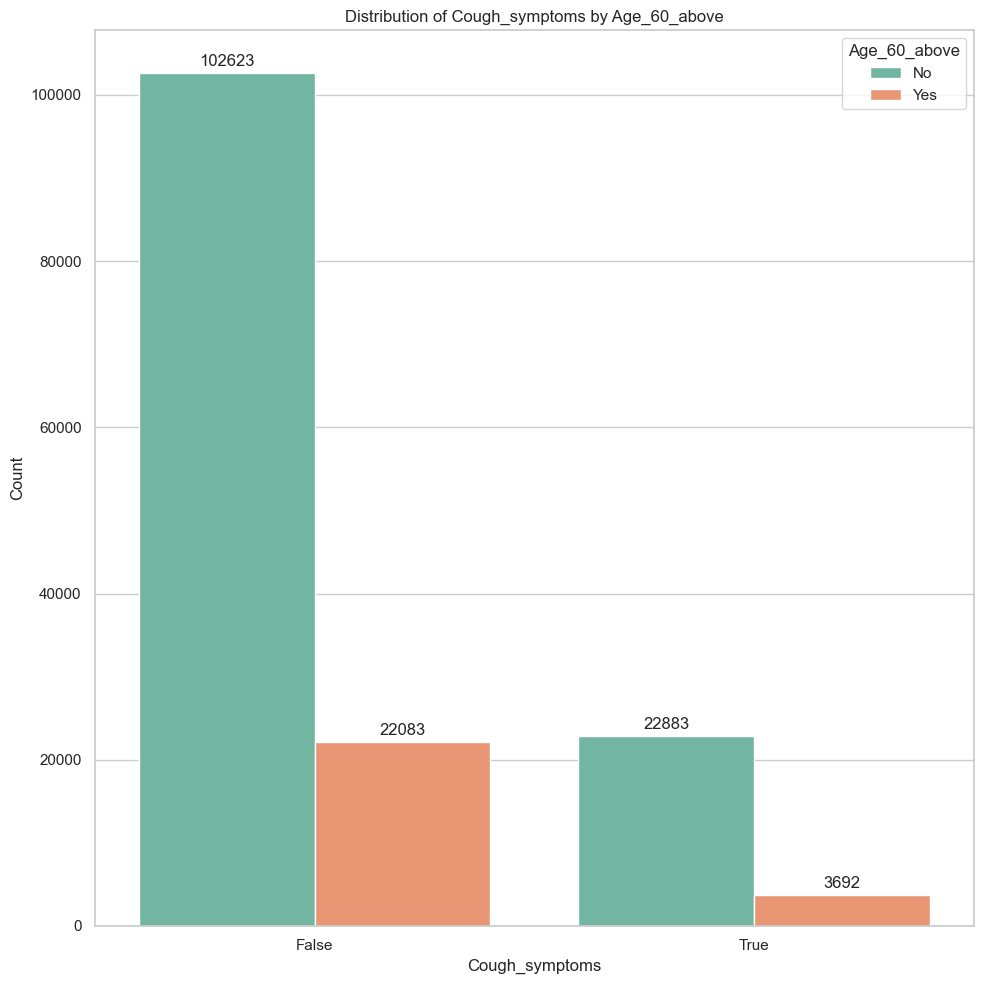

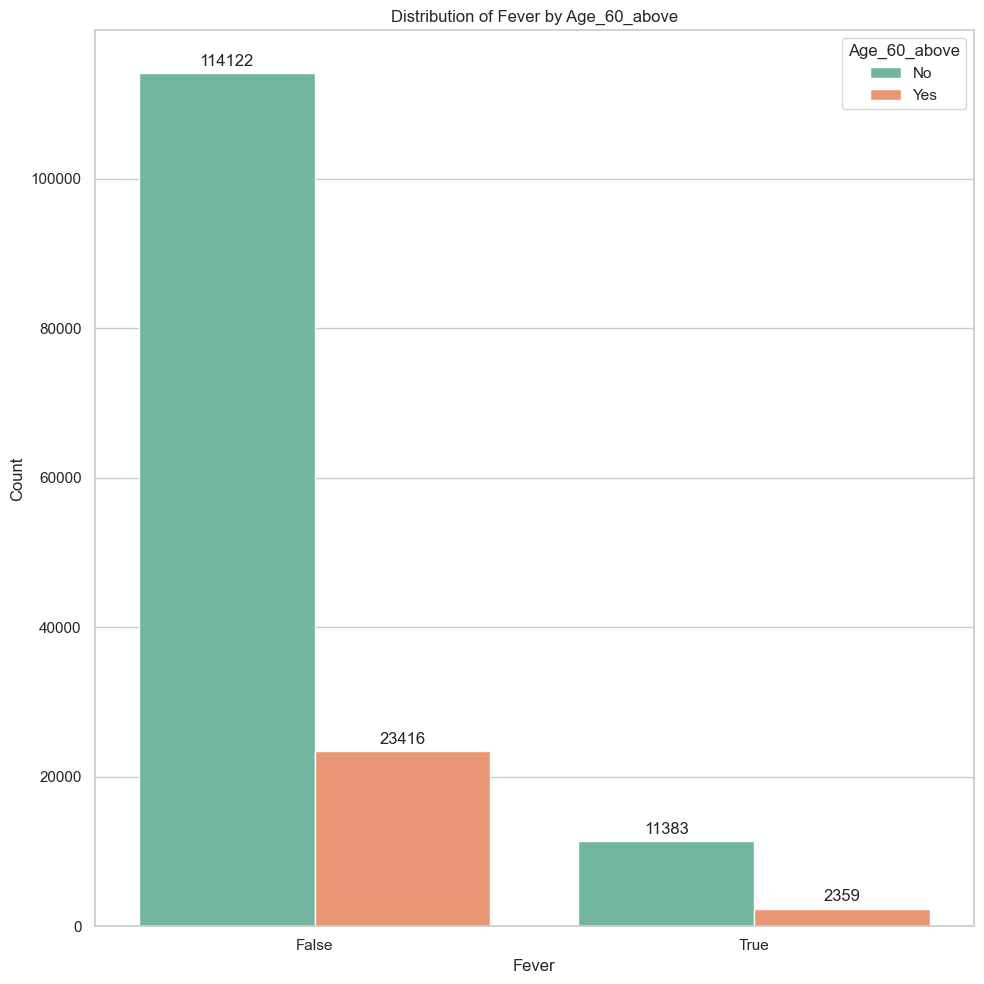

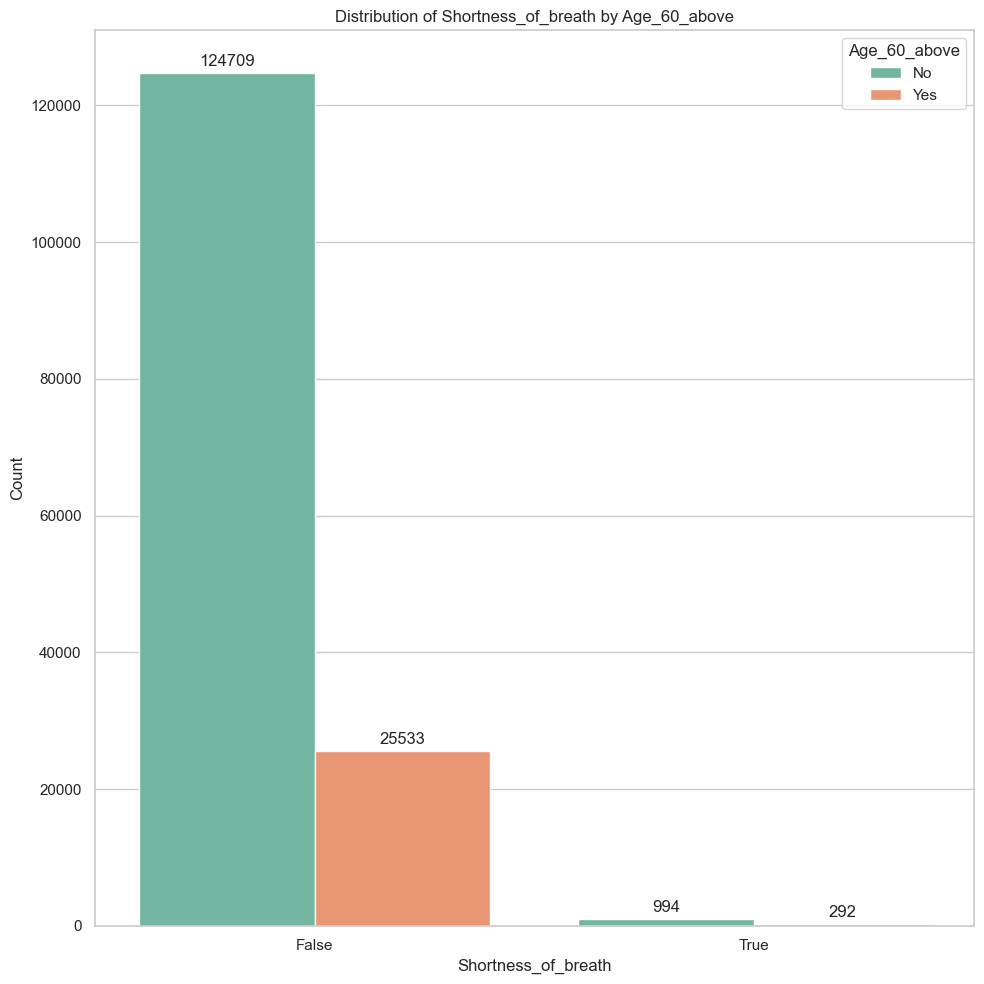

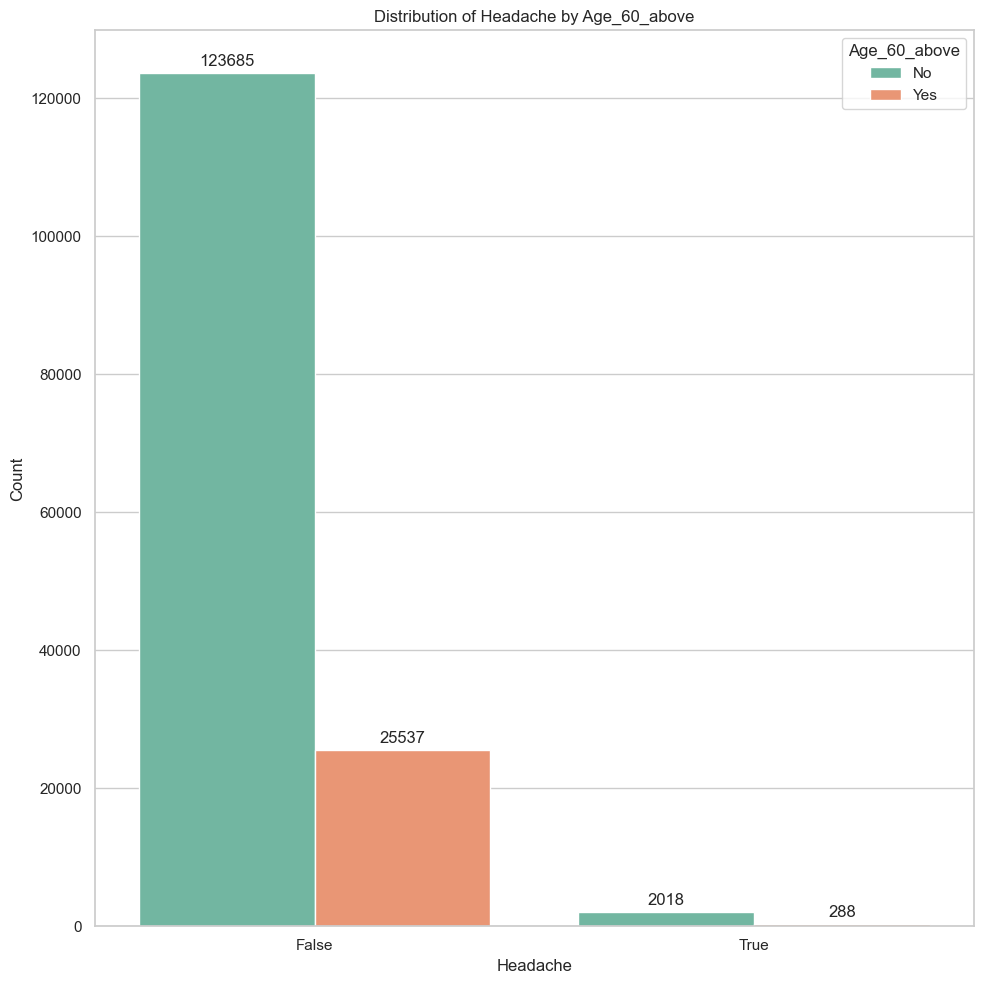

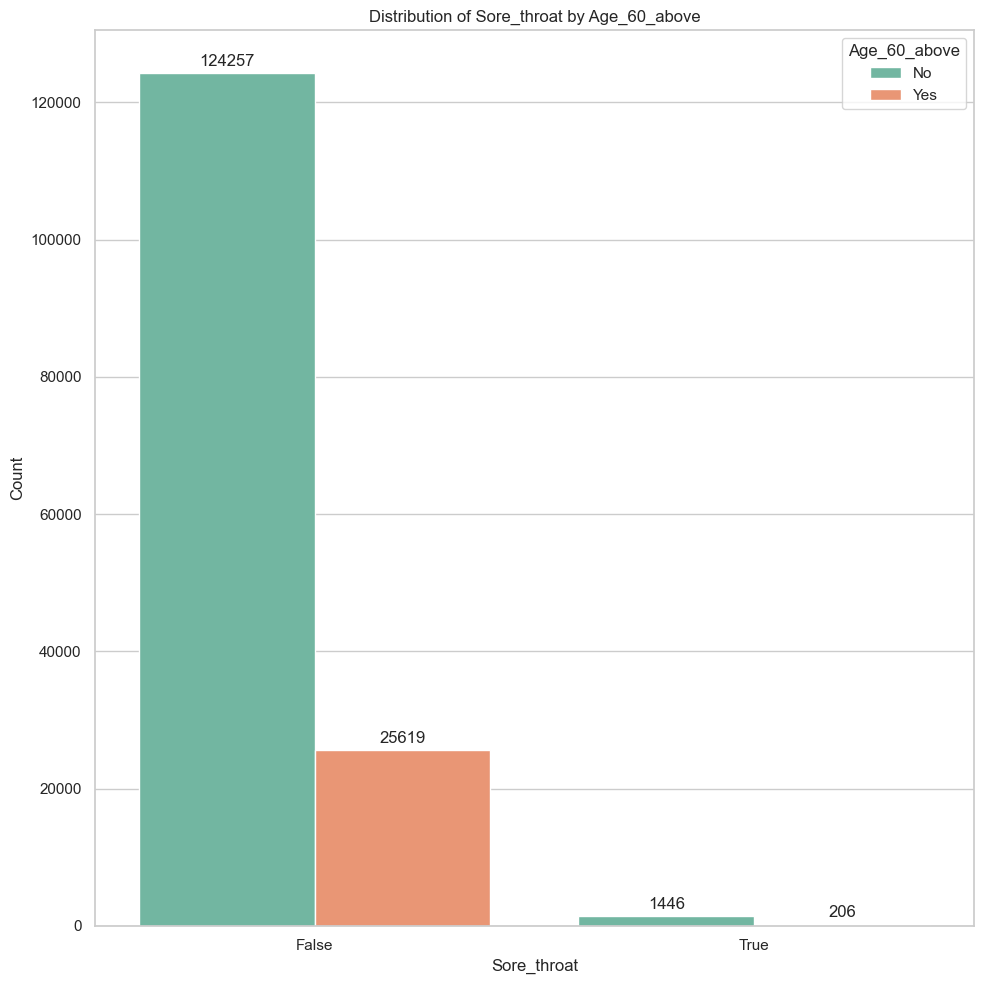

In [109]:

# List of symptom columns
symptoms = ['Cough_symptoms', 'Fever', 'Shortness_of_breath', 'Headache', 'Sore_throat']

# Set plot style
sns.set(style="whitegrid")

# Loop through each symptom and create a bar plot
for symptom in symptoms:
    plt.figure(figsize=(10,10))
    ax = sns.countplot(data=df2, x=symptom, hue='Age_60_above', palette='Set2')

    # Add value labels on top of each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

    # Add title and labels
    plt.title(f'Distribution of {symptom} by Age_60_above')
    plt.xlabel(symptom)
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()




In [110]:
df2['Test_date'].value_counts()

Test_date
20-04-2020    10921
19-04-2020    10199
22-04-2020     9646
21-04-2020     9624
16-04-2020     9138
23-04-2020     8744
01-04-2020     8654
13-04-2020     8425
02-04-2020     8188
03-04-2020     8079
17-04-2020     7645
05-04-2020     7509
30-04-2020     7313
27-04-2020     7304
15-04-2020     7149
31-03-2020     7134
24-04-2020     7028
26-03-2020     6663
14-04-2020     6571
28-04-2020     6334
18-04-2020     6321
26-04-2020     6131
12-04-2020     5984
27-03-2020     5963
07-04-2020     5931
30-03-2020     5915
10-04-2020     5678
28-03-2020     5602
25-03-2020     5495
06-04-2020     5368
29-03-2020     5277
04-04-2020     5145
25-04-2020     5052
24-03-2020     4735
09-04-2020     4539
11-04-2020     4341
29-04-2020     4259
08-04-2020     4058
22-03-2020     3565
23-03-2020     3494
19-03-2020     2243
18-03-2020     1991
20-03-2020     1870
21-03-2020     1648
17-03-2020     1463
16-03-2020     1304
15-03-2020      985
13-03-2020      686
12-03-2020      634
14-03-2020

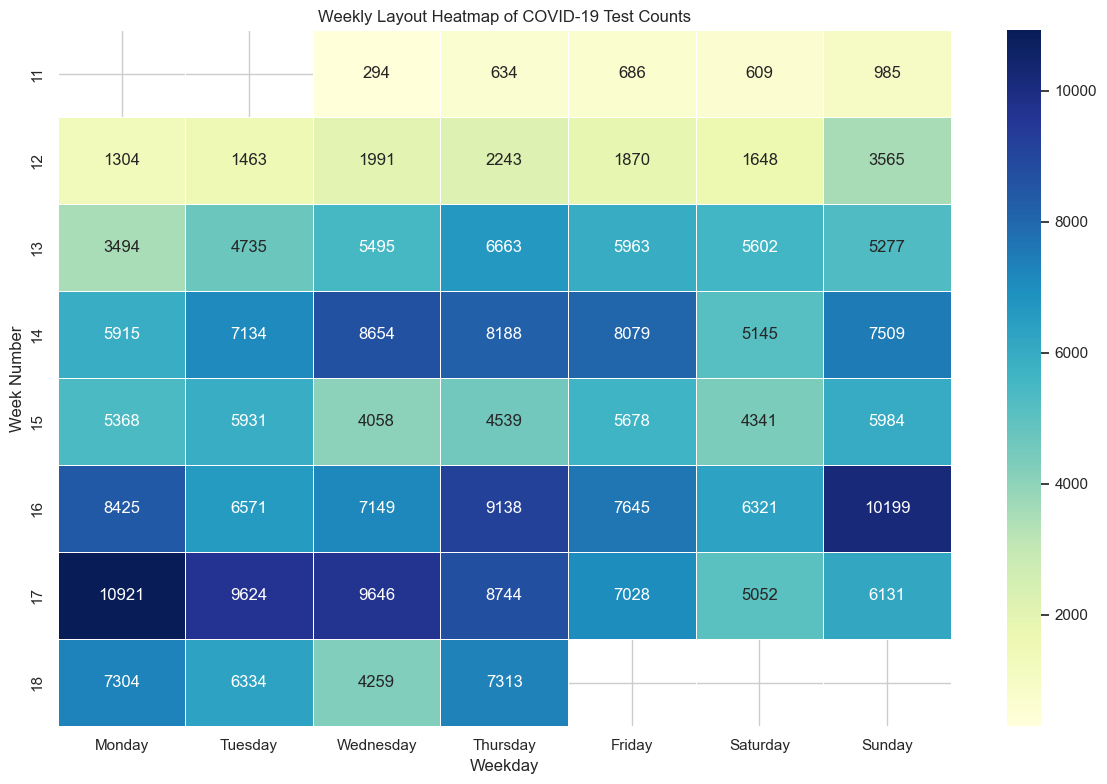

In [111]:

# Provided data
data = {
    'Test_date': [
        '20-04-2020', '19-04-2020', '22-04-2020', '21-04-2020', '16-04-2020', '23-04-2020', '01-04-2020', '13-04-2020',
        '02-04-2020', '03-04-2020', '17-04-2020', '05-04-2020', '30-04-2020', '27-04-2020', '15-04-2020', '31-03-2020',
        '24-04-2020', '26-03-2020', '14-04-2020', '28-04-2020', '18-04-2020', '26-04-2020', '12-04-2020', '27-03-2020',
        '07-04-2020', '30-03-2020', '10-04-2020', '28-03-2020', '25-03-2020', '06-04-2020', '29-03-2020', '04-04-2020',
        '25-04-2020', '24-03-2020', '09-04-2020', '11-04-2020', '29-04-2020', '08-04-2020', '22-03-2020', '23-03-2020',
        '19-03-2020', '18-03-2020', '20-03-2020', '21-03-2020', '17-03-2020', '16-03-2020', '15-03-2020', '13-03-2020',
        '12-03-2020', '14-03-2020', '11-03-2020'
    ],
    'Count': [
        10921, 10199, 9646, 9624, 9138, 8744, 8654, 8425, 8188, 8079, 7645, 7509, 7313, 7304, 7149, 7134, 7028, 6663,
        6571, 6334, 6321, 6131, 5984, 5963, 5931, 5915, 5678, 5602, 5495, 5368, 5277, 5145, 5052, 4735, 4539, 4341, 4259,
        4058, 3565, 3494, 2243, 1991, 1870, 1648, 1463, 1304, 985, 686, 634, 609, 294
    ]
}

# Create DataFrame
df_date = pd.DataFrame(data)
df_date['Test_date'] = pd.to_datetime(df_date['Test_date'], format='%d-%m-%Y')

# Extract week number and weekday
df_date['Week'] = df_date['Test_date'].dt.isocalendar().week
df_date['Weekday'] = df_date['Test_date'].dt.day_name()

# Pivot table for heatmap
heatmap_data = df_date.pivot_table(index='Week', columns='Weekday', values='Count', aggfunc='sum')

# Reorder weekdays
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(columns=ordered_days)

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=.5)
plt.title('Weekly Layout Heatmap of COVID-19 Test Counts')
plt.xlabel('Weekday')
plt.ylabel('Week Number')
plt.tight_layout()
plt.show()


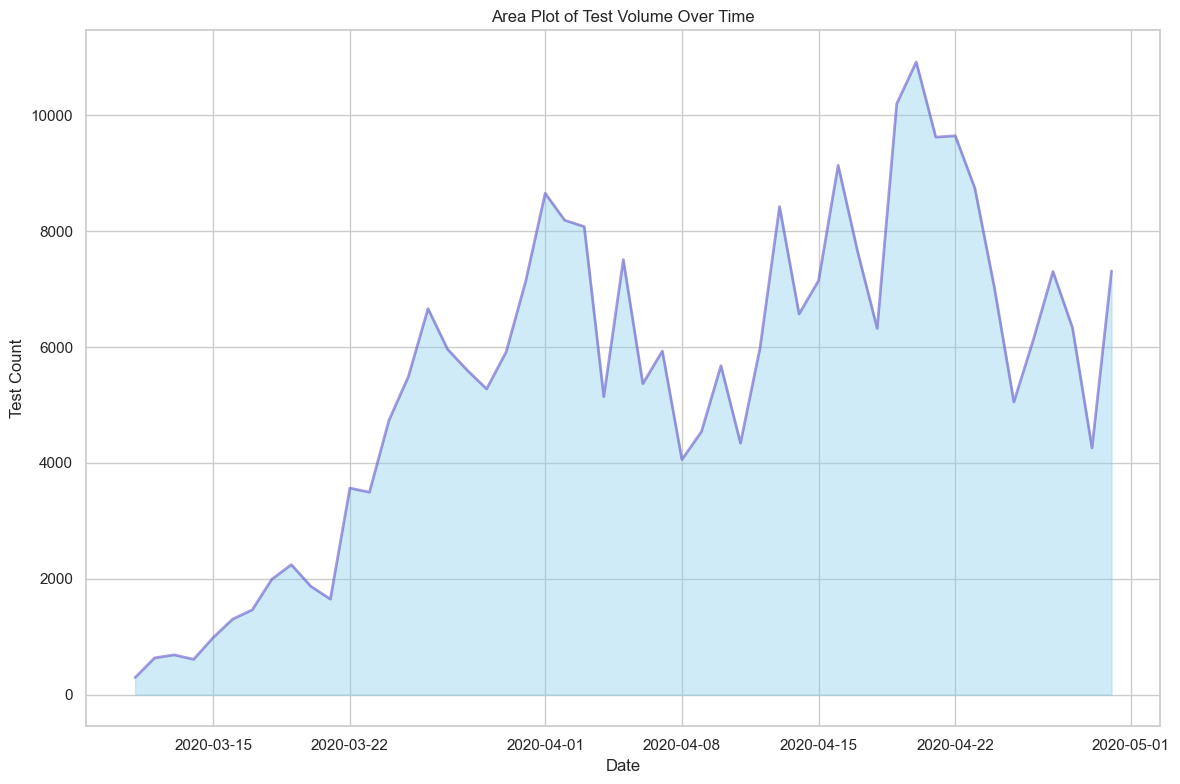

In [112]:
# Set figure size
plt.figure(figsize=(12, 8))
df_sorted = df_date.sort_values('Test_date')
plt.fill_between(df_sorted['Test_date'], df_sorted['Count'], color='skyblue', alpha=0.4)
plt.plot(df_sorted['Test_date'], df_sorted['Count'], color='Slateblue', alpha=0.6, linewidth=2)
plt.title('Area Plot of Test Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Test Count')
plt.tight_layout()



C:\Users\samya\AppData\Local\Temp\ipykernel_6052\3502375555.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_date, x='Week', y='Count', palette='Set3')


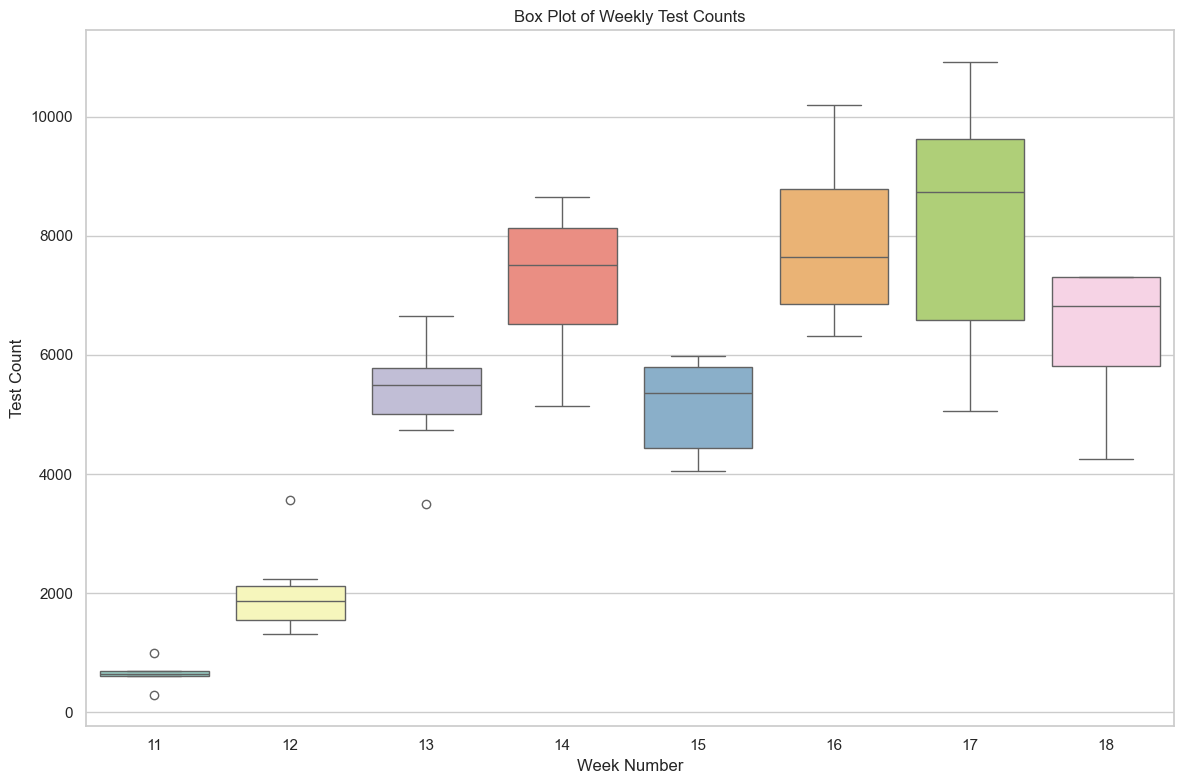

In [113]:
plt.figure(figsize=(12, 8))

# Create the box plot
sns.boxplot(data=df_date, x='Week', y='Count', palette='Set3')

plt.title('Box Plot of Weekly Test Counts')
plt.xlabel('Week Number')
plt.ylabel('Test Count')
plt.tight_layout()


C:\Users\samya\AppData\Local\Temp\ipykernel_6052\2056674315.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_date, x='Test_date', y='Count', palette='viridis')


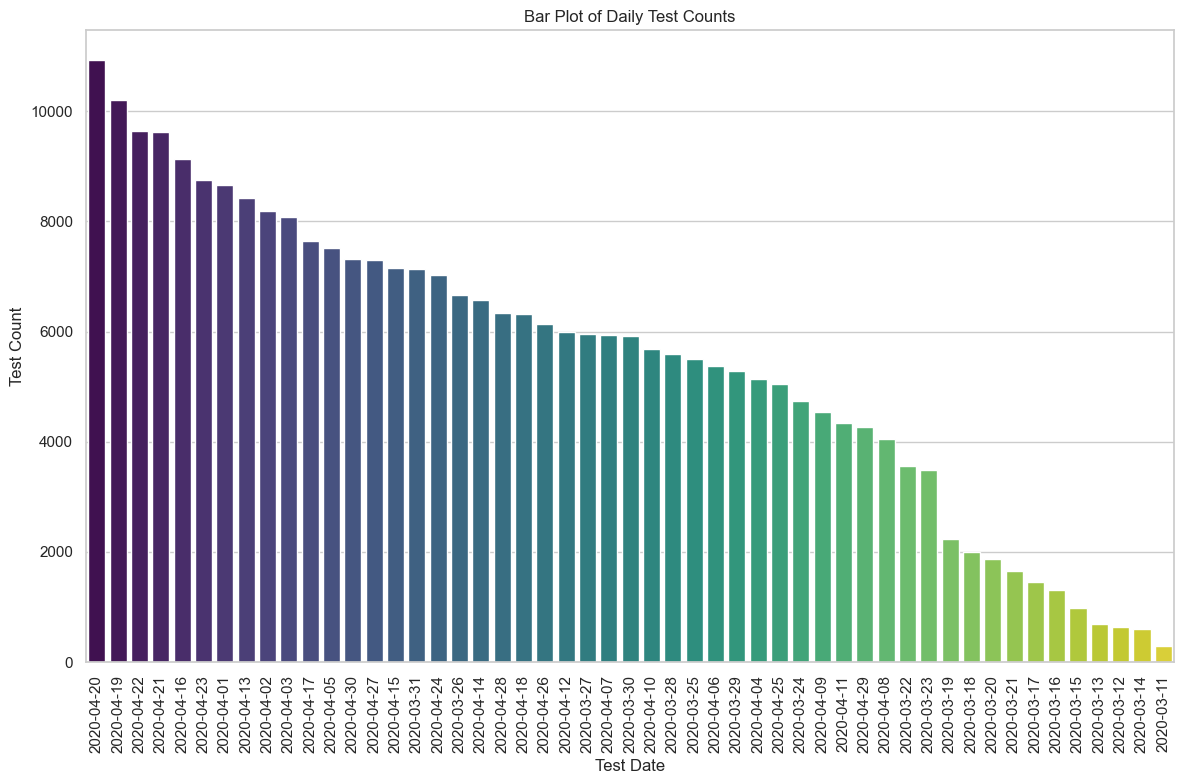

In [114]:
# Set figure size
plt.figure(figsize=(12, 8))
sns.barplot(data=df_date, x='Test_date', y='Count', palette='viridis')
plt.title('Bar Plot of Daily Test Counts')
plt.xlabel('Test Date')
plt.ylabel('Test Count')
plt.xticks(rotation=90)
plt.tight_layout()






In [115]:
df_covid.describe()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
count,278594,278594,278594,278594,278594,278594,278594
unique,2,2,2,2,2,3,3
top,False,False,False,False,False,negative,Other
freq,236368,256843,276672,277020,276186,260008,242504


Machine Learning Model

In [116]:
df_covid_encoded= df.apply(LabelEncoder().fit_transform)

In [117]:
df_covid_encoded

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
0,1,0,1,0,0,0,0
1,0,1,0,0,0,1,0
2,0,1,0,0,0,1,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...
278843,0,0,0,0,0,1,2
278844,0,0,0,0,0,0,2
278845,0,0,0,0,0,0,2
278846,0,0,0,0,0,0,2


In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(df_covid_encoded, hue="Corona")


Correlation 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
corr = df_covid_encoded.corr()
sns.heatmap(corr, annot=True, fmt=".2f",
center=0,square=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# ============================================
# 6. Evaluation Function
# ============================================
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt 
import seaborn as sns


def evaluate_model(model, X_test, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f"\nModel: {type(model).__name__}")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-Score : {f1:.4f}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
    plt.title(f'Confusion Matrix - {type(model).__name__}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:
features = df_covid_encoded.drop(columns="Corona")  #features
target = df_covid_encoded["Corona"]   # target

In [ ]:
from sklearn.model_selection import train_test_split
#from sklearn.discriminant_analysis import StandardScaler

X_train, X_test, Y_train, Y_test= train_test_split (features,target,test_size=0.20,random_state=42)



Applying the the ml models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


def train_and_evaluate_models(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    models = [
        LogisticRegression(),
        KNeighborsClassifier(),
        DecisionTreeClassifier(max_depth=5, criterion='gini'),
        RandomForestClassifier(n_estimators=100, criterion='gini',),
        XGBClassifier()
    ]

    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        evaluate_model(model, X_test, y_test, y_pred)

In [ ]:
train_and_evaluate_models(X_train, Y_train)